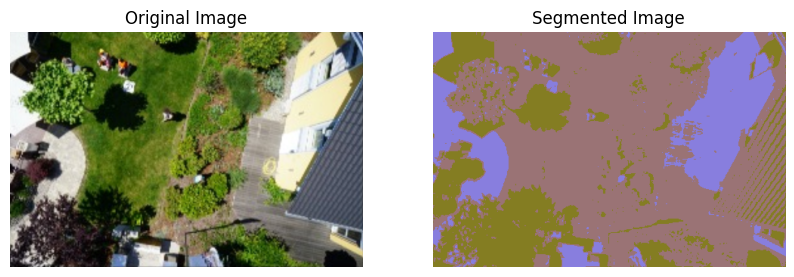

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def plot_images(original, segmented):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.show()

# Read the image
image = cv2.imread('Picture1.png')

# Step 1: Noise Reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Brightness and Contrast Adjustment
image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(image_gray)

# Step 3: Color Space Conversion
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Step 4: Normalization
normalized_image = lab_image / 255.0

# Step 5: Flatten the Image
pixel_values = normalized_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply K-means with 2 Clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert Centers to 8-bit Values
centers = np.uint8(centers * 255)

# Map the Labels to the Centers
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the results
plot_images(image, segmented_image)


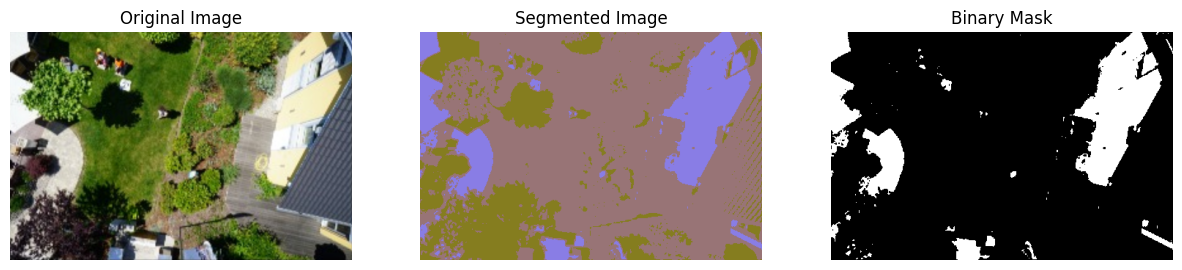

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def plot_images(original, segmented, binary_mask):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    plt.show()

# Read the image
image = cv2.imread('Picture1.png')

# Step 1: Noise Reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Brightness and Contrast Adjustment
image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(image_gray)

# Step 3: Color Space Conversion
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Step 4: Normalization
normalized_image = lab_image / 255.0

# Step 5: Flatten the Image
pixel_values = normalized_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply K-means with 2 Clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.9)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert Centers to 8-bit Values
centers = np.uint8(centers * 255)

# Map the Labels to the Centers
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Convert the labels to binary mask where trees are 1 and background is 0
# Assuming the cluster with the larger area is the background and the other is trees
if np.sum(labels == labels[0, 0]) > np.sum(labels == labels[-1, -1]):
    tree_label = 1 - labels[0, 0]
else:
    tree_label = labels[0, 0]

binary_mask = (labels.reshape(image.shape[:2]) == tree_label).astype(np.uint8)

# Plot the results
plot_images(image, segmented_image, binary_mask)


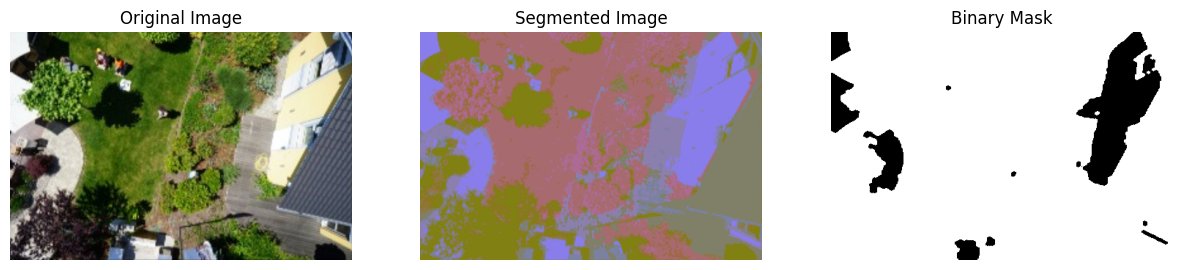

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def plot_images(original, segmented, binary_mask):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    plt.show()

# Read the image
image = cv2.imread('Picture1.png')

# Step 1: Noise Reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Brightness and Contrast Adjustment
image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(image_gray)

# Step 3: Color Space Conversion
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Step 4: Normalization
normalized_image = lab_image / 255.0

# Step 5: Flatten the Image
pixel_values = normalized_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply K-means with 3 Clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 10
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert Centers to 8-bit Values
centers = np.uint8(centers * 255)

# Map the Labels to the Centers
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Convert the labels to binary mask where trees are 1 and background is 0
# Determine the tree cluster by analyzing the cluster centers
background_label = np.argmax(np.sum(centers, axis=1))  # Assume the cluster with the highest sum of color channels is background
binary_mask = (labels.reshape(image.shape[:2]) != background_label).astype(np.uint8)

# Morphological operations to refine the binary mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

# Plot the results
plot_images(image, segmented_image, binary_mask)
